# PROJETO DE DISCIPLINA - REDES NEURAIS

### Aluno: Gabriel Angelo Bassetti Machado

### 1.0 - Importando bibliotecas

In [40]:
# Para o EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para criação do modelo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Para o PCA e avaliação

from sklearn.decomposition import PCA


### 2.0 - EDA

Questão 1 - carregar dados e realizar a limpeza dos dados se necessário.

Questão 2 - Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada classe)

2.1 - Definindo funções

In [2]:
def plot_histograma(dataframe, features):
  
    
    # Configuração do estilo Seaborn (opcional)
    sns.set(style="whitegrid")

    # Configuração do layout dos subplots
    num_plots = len(features)
    num_cols = 2  # Defina o número desejado de colunas
    num_rows = -(-num_plots // num_cols)  # Cálculo de linhas necessárias

    # Configuração do tamanho do gráfico
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Certifica-se de que axes é sempre um array, mesmo que num_plots seja 1
    if num_plots == 1:
        axes = [axes]

    # Itera sobre as colunas e plota os histogramas
    for col, ax in zip(features, [item for sublist in axes for item in sublist]):
        sns.histplot(dataframe[col], ax=ax, kde=True)
        ax.set_title(f'Histograma de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')

    # Ajusta o layout final
    plt.tight_layout()
    plt.show()

2.2 - Carregando dados

In [3]:
url = (r'db.csv')

In [4]:
main_df = pd.read_csv(url)
main_df.head()

t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
0  24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1  23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2  -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3  12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4  24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   

   t191  t192  t193  t194  t195  t196  t197  t198  t199  Classes  
0  1.00 -1.00  1.00 -1.00  1.00  0.00  1.00  0.00  0.00        1  
1 -1.00  1.00  0.00  1.00 -1.00  0.00 -1.00  1.00  0.00        1  
2 -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55        1  
3 -0.70  0.30 -0.70  0.30 -0.70  1.30 -0.70  1.30 -0.70        1  
4 -0.15  0.85 -1.15 -0.15 -1.15  0.85 -0.15  0.85 -0.15        2  

[5 rows x 201 columns]

2.3 - Verificação dos dados

In [5]:
# Verificando estrutura de dados

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [6]:
# Verificando dados estatísticos das colunas

main_df.describe()

t0          t1          t2          t3          t4          t5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    11.114000    7.974000    8.154000    7.334000    7.374000    6.834000   
std     10.187807    9.012776    8.899937    8.958318    8.458134    8.301816   
min    -10.150000   -6.300000   -6.300000   -6.300000   -5.300000   -3.500000   
25%      0.650000    0.450000    0.700000    0.450000    0.650000    0.450000   
50%     11.925000    5.575000    4.950000    4.300000    3.600000    3.050000   
75%     21.250000   14.900000   17.450000   16.950000   14.900000   13.000000   
max     25.850000   25.450000   26.200000   25.200000   25.200000   25.000000   

               t6          t7          t8          t9  ...        t191  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean     7.134000    6.874000    7.054000    6.594000  ...    0.114000   
std      8.230796    8.317599    8.269182    7.937996  ...    2.253057   
min     -4.300000   -6.300000   -6.300000   -4.300000  ...   -2.500000   
25%      0.600000    0.850000    0.650000    0.650000  ...   -0.700000   
50%      3.300000    3.325000    3.225000    3.850000  ...   -0.300000   
75%     14.000000   13.000000   11.950000   10.950000  ...    0.300000   
max     24.200000   25.200000   26.200000   25.200000  ...   13.550000   

            t192        t193        t194        t195        t196       t197  \
count  100.00000  100.000000  100.000000  100.000000  100.000000  100.00000   
mean    -0.14600   -0.146000    0.154000    0.014000    0.374000   -0.20600   
std      0.86292    0.829497    1.009442    1.114779    0.969548    0.78757   
min     -2.40000   -2.050000   -2.500000   -2.150000   -2.500000   -2.30000   
25%     -0.75000   -0.700000   -0.550000   -0.800000   -0.100000   -0.70000   
50%     -0.07500   -0.200000    0.275000   -0.075000    0.400000   -0.32500   
75%      0.45000    0.550000    0.700000    0.700000    0.850000    0.35000   
max      1.70000    1.500000    2.650000    3.500000    3.800000    1.35000   

             t198        t199     Classes  
count  100.000000  100.000000  100.000000  
mean    -0.146000   -0.186000    3.140000  
std      1.046004    0.838411    1.608186  
min     -2.500000   -2.050000    1.000000  
25%     -0.750000   -0.700000    2.000000  
50%     -0.025000   -0.275000    3.000000  
75%      0.450000    0.250000    4.000000  
max      1.850000    2.500000    7.000000  

[8 rows x 201 columns]

In [7]:
# plotando histograma das colunas

colunas = main_df.columns

colunas

Index(['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
       ...
       't191', 't192', 't193', 't194', 't195', 't196', 't197', 't198', 't199',
       'Classes'],
      dtype='object', length=201)

In [8]:
# Verificando valores únicos na coluna que aparentemente será nosso target

main_df['Classes'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [10]:
# Fazendo groupby do target

main_df.groupby('Classes')['Classes'].count()

Classes
1    16
2    22
3    30
4     8
5    16
6     4
7     4
Name: Classes, dtype: int64

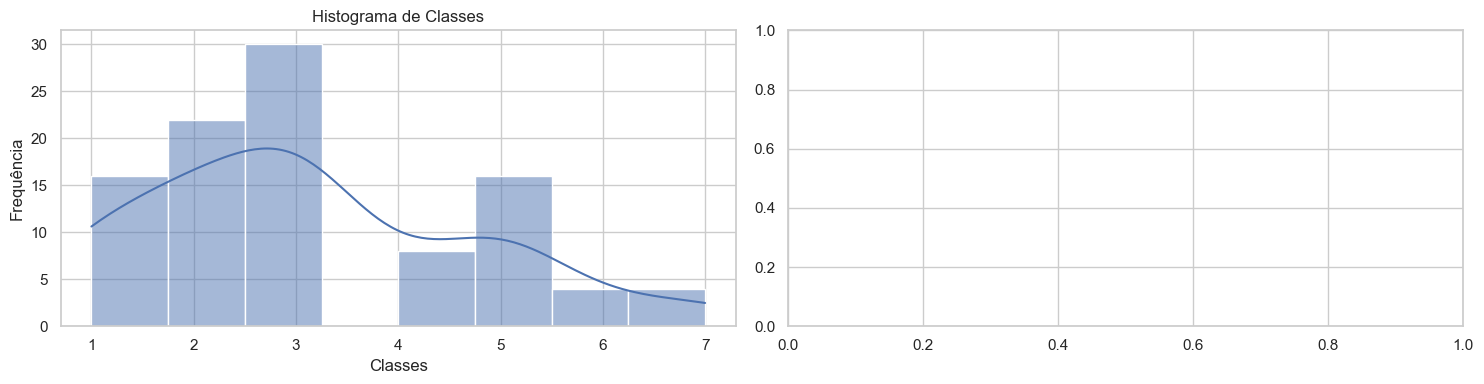

In [ ]:
# plotando gráfico do target para ver se está balanceado

plot_histograma(main_df, ['Classes'])

In [11]:
# plotando gráfico de todas as features

plot_histograma(main_df, main_df.columns)

2.3.1 - Verificando se possui valores nulos

In [12]:
nulos = main_df[main_df.isnull().any(axis=1)]

nulos

Empty DataFrame
Columns: [t0, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17, t18, t19, t20, t21, t22, t23, t24, t25, t26, t27, t28, t29, t30, t31, t32, t33, t34, t35, t36, t37, t38, t39, t40, t41, t42, t43, t44, t45, t46, t47, t48, t49, t50, t51, t52, t53, t54, t55, t56, t57, t58, t59, t60, t61, t62, t63, t64, t65, t66, t67, t68, t69, t70, t71, t72, t73, t74, t75, t76, t77, t78, t79, t80, t81, t82, t83, t84, t85, t86, t87, t88, t89, t90, t91, t92, t93, t94, t95, t96, t97, t98, t99, ...]
Index: []

[0 rows x 201 columns]

Nossa dataset não possui nenhum valor nulo.

2.3.2 - Verificando se possui valores zerados

In [13]:
zeros = main_df[main_df.eq(0).any(axis=1)]

zeros

t0    t1    t2    t3    t4    t5    t6    t7    t8    t9  ...  t191  \
0   24.0  24.0  23.0  25.0  24.0  25.0  24.0  24.0  22.0  25.0  ...   1.0   
1   23.0  23.0  22.0  21.0  21.0  22.0  23.0  23.0  22.0  21.0  ...  -1.0   
29  24.0  24.0  23.0  25.0  24.0  25.0  24.0  24.0  22.0  25.0  ...   1.0   
30  23.0  23.0  22.0  21.0  21.0  22.0  23.0  23.0  22.0  21.0  ...  -1.0   
69  24.0  22.0  20.0  17.0  15.0  13.0  14.0  13.0  13.0  10.0  ...  -1.0   
74  24.0  22.0  20.0  17.0  15.0  13.0  14.0  13.0  13.0  10.0  ...  -1.0   

    t192  t193  t194  t195  t196  t197  t198  t199  Classes  
0   -1.0   1.0  -1.0   1.0   0.0   1.0   0.0   0.0        1  
1    1.0   0.0   1.0  -1.0   0.0  -1.0   1.0   0.0        1  
29  -1.0   1.0  -1.0   1.0   0.0   1.0   0.0   0.0        1  
30   1.0   0.0   1.0  -1.0   0.0  -1.0   1.0   0.0        1  
69   1.0  -1.0   1.0  -1.0   1.0  -1.0   1.0  -1.0        3  
74   1.0  -1.0   1.0  -1.0   1.0  -1.0   1.0  -1.0        3  

[6 rows x 201 columns]

In [14]:
# Buscando linhas com valores zerados

indices = zeros.index

In [15]:
# Verificando valores zerados em cada coluna

dict_linha_coluna_zero = dict()

for elem in indices:
    # Verificar em quais colunas há valores zerados na linha especificada
    colunas_com_zeros = main_df.iloc[elem].eq(0)

    # Imprimir o nome das colunas com valores zerados
    print("Colunas com valores zerados na linha", elem, ":")
    for coluna, valor in colunas_com_zeros.items():
        if valor:
            print(coluna)

Colunas com valores zerados na linha 0 :
t28
t29
t30
t33
t36
t39
t43
t45
t48
t51
t55
t60
t63
t64
t66
t67
t68
t69
t70
t72
t73
t75
t76
t78
t79
t80
t81
t82
t84
t85
t87
t88
t90
t94
t96
t99
t100
t102
t105
t124
t126
t127
t130
t132
t133
t136
t138
t139
t141
t142
t144
t145
t147
t148
t149
t150
t151
t153
t154
t156
t159
t160
t162
t163
t165
t166
t171
t172
t184
t187
t196
t198
t199
Colunas com valores zerados na linha 1 :
t51
t55
t57
t59
t61
t63
t65
t67
t71
t77
t83
t95
t125
t131
t135
t137
t141
t143
t147
t149
t151
t153
t155
t157
t159
t161
t163
t169
t175
t181
t184
t190
t193
t196
t199
Colunas com valores zerados na linha 29 :
t28
t29
t30
t33
t36
t39
t43
t45
t48
t51
t55
t60
t63
t64
t66
t67
t68
t69
t70
t72
t73
t75
t76
t78
t79
t80
t81
t82
t84
t85
t87
t88
t90
t94
t96
t99
t100
t102
t105
t124
t126
t127
t130
t132
t133
t136
t138
t139
t141
t142
t144
t145
t147
t148
t149
t150
t151
t153
t154
t156
t159
t160
t162
t163
t165
t166
t171
t172
t184
t187
t196
t198
t199
Colunas com valores zerados na linha 30 :
t51
t55
t57
t

Analisando os histogramas e os dados, não irei fazer nenhum tratamento nos valores zerados.

2.3.3 - Verificando se possui linhas duplicadas.

In [18]:
# Verificando linhas duplicadas

duplicadas = main_df[main_df.duplicated()]

duplicadas

t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
29  24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
30  23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
32  -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
33  12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
34  15.10  15.10  22.10  23.10  22.10  21.10  14.10  23.10  23.10  23.10  ...   
35  -2.50  -2.50  -3.50  -3.50  -3.50  -3.50  -2.50   2.50  11.50   9.50  ...   
36  19.20  17.20  26.20  25.20  25.20  23.20  24.20  25.20  26.20  25.20  ...   
37  15.90  14.90  22.90  24.90  24.90  22.90  22.90  21.90  24.90  22.90  ...   
42  24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
43  -0.35  -0.35   0.65  -0.35   0.65  -0.35  -0.35  -0.35   0.65  -0.35  ...   
44   0.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45  ...   
45   4.90   5.90   6.90   4.90   3.90   2.90   3.90   3.90   4.90   3.90  ...   
46   0.10   0.10  -0.90   0.10   0.10   0.10   0.10  -0.90  -0.90   0.10  ...   
49   0.65   0.65   0.65  -1.35  -0.35  -0.35   1.65  -0.35   0.65  -1.35  ...   
50   0.60  -0.40   0.60  -1.40   0.60   0.60   0.60  -0.40   0.60  -1.40  ...   
51   2.70   2.70   0.70   0.70   0.70   2.70   1.70   1.70  -0.30  -0.30  ...   
52  -0.40   1.60   0.60   0.60   0.60  -0.40  -1.40   1.60   0.60   1.60  ...   
53   1.15  -0.85   0.15   0.15   0.15  -0.85   0.15  -0.85   1.15  -0.85  ...   
54 -10.15  -1.15  -1.15   0.85  -0.15   0.85  -0.15   0.85  -0.15   0.85  ...   
61  14.30  11.30   8.30   8.30   8.30   8.30   8.30   7.30   6.30   6.30  ...   
62  15.25   4.25   8.25   4.25   8.25   5.25   6.25   5.25   5.25   5.25  ...   
63   3.55   6.55   4.55   6.55   6.55   5.55   3.55   5.55   3.55   5.55  ...   
64  23.50  21.50  21.50  18.50  16.50  14.50  14.50   8.50   2.50   7.50  ...   
65  22.45  21.45  21.45  19.45  17.45  18.45  19.45  18.45  18.45  15.45  ...   
66  11.20   8.20   9.20   9.20   9.20   8.20   7.20   7.20   8.20   8.20  ...   
67  -5.05  -2.05   3.95   0.95   2.95   0.95  -0.05   0.95   1.95   0.95  ...   
70  23.95  18.95  17.95  16.95  13.95  10.95  13.95  11.95  11.95  10.95  ...   
71  19.80  14.80  13.80  12.80   9.80   8.80   7.80   4.80   5.80   3.80  ...   
72  21.25  19.25  20.25  18.25  18.25  15.25  14.25  15.25  16.25  16.25  ...   
73  -4.95  25.05  24.05  22.05  21.05  22.05  21.05  20.05  15.05  12.05  ...   
74  24.00  22.00  20.00  17.00  15.00  13.00  14.00  13.00  13.00  10.00  ...   
75  14.65   8.65  10.65  10.65   8.65   9.65  10.65   9.65  11.65   9.65  ...   
76   7.75   0.75   0.75   1.75   0.75   1.75   0.75   1.75   0.75   1.75  ...   
77  -0.55  -0.55  -0.55  -0.55  -0.55   1.45   4.45   3.45   8.45   7.45  ...   
80   9.65  -1.35   2.65  -1.35   0.65  -1.35   1.65  -0.35   1.65   0.65  ...   
81   9.20   3.20   3.20   3.20   3.20   3.20   4.20   3.20   3.20   3.20  ...   
82   6.05   1.05   3.05   1.05   4.05   2.05   3.05   2.05   3.05   1.05  ...   
83   9.30   8.30   8.30   7.30   7.30   8.30   9.30   8.30   8.30   7.30  ...   
87  14.35  10.35   5.35   4.35   3.35   3.35   1.35   2.35  -0.65   1.35  ...   
88  24.90  23.90  19.90  17.90  14.90  13.90  13.90  13.90  11.90  11.90  ...   
89  25.45  25.45  17.45  17.45  20.45  21.45  21.45  19.45  18.45  15.45  ...   
90  22.05  13.05   8.05   3.05   1.05   2.05   3.05   2.05   0.05   1.05  ...   
92   9.25  10.25   3.25   5.25   3.25   4.25   2.25   4.25   3.25   4.25  ...   
93  19.60   5.60   3.60   4.60   2.60   2.60  -0.40   0.60   1.60   3.60  ...   
94  25.85   2.85   5.85   7.85   3.85  -0.15   1.85   1.85   2.85   0.85  ...   
95  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
96  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
97  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
98  22.70  -5.30  -0.30  -5.30  -1.30 

In [19]:
# Dropando linhas duplicadas para não viciar o modelo e criando novo dataframe

df = main_df.drop_duplicates()

df

t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
0   24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1   23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2   -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3   12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4   24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
5   -0.35  -0.35   0.65  -0.35   0.65  -0.35  -0.35  -0.35   0.65  -0.35  ...   
6    0.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45  ...   
7    4.90   5.90   6.90   4.90   3.90   2.90   3.90   3.90   4.90   3.90  ...   
8    0.10   0.10  -0.90   0.10   0.10   0.10   0.10  -0.90  -0.90   0.10  ...   
9   14.30  11.30   8.30   8.30   8.30   8.30   8.30   7.30   6.30   6.30  ...   
10  15.25   4.25   8.25   4.25   8.25   5.25   6.25   5.25   5.25   5.25  ...   
11   3.55   6.55   4.55   6.55   6.55   5.55   3.55   5.55   3.55   5.55  ...   
12  23.50  21.50  21.50  18.50  16.50  14.50  14.50   8.50   2.50   7.50  ...   
13  22.45  21.45  21.45  19.45  17.45  18.45  19.45  18.45  18.45  15.45  ...   
14  -5.05  -2.05   3.95   0.95   2.95   0.95  -0.05   0.95   1.95   0.95  ...   
15  11.20   8.20   9.20   9.20   9.20   8.20   7.20   7.20   8.20   8.20  ...   
16   9.65  -1.35   2.65  -1.35   0.65  -1.35   1.65  -0.35   1.65   0.65  ...   
17   9.20   3.20   3.20   3.20   3.20   3.20   4.20   3.20   3.20   3.20  ...   
18  14.35  10.35   5.35   4.35   3.35   3.35   1.35   2.35  -0.65   1.35  ...   
19  24.90  23.90  19.90  17.90  14.90  13.90  13.90  13.90  11.90  11.90  ...   
20  25.45  25.45  17.45  17.45  20.45  21.45  21.45  19.45  18.45  15.45  ...   
21  22.05  13.05   8.05   3.05   1.05   2.05   3.05   2.05   0.05   1.05  ...   
22  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
23  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
24  -5.30  -6.30  -6.30  -6.30  -5.30  -3.30  -4.30  -6.30  -6.30  -4.30  ...   
25  22.70  -5.30  -0.30  -5.30  -1.30  -3.30  -1.30  -3.30  -2.30  -3.30  ...   
26  19.20  17.20  26.20  25.20  25.20  23.20  24.20  25.20  26.20  25.20  ...   
27  15.10  15.10  22.10  23.10  22.10  21.10  14.10  23.10  23.10  23.10  ...   
28  -2.50  -2.50  -3.50  -3.50  -3.50  -3.50  -2.50   2.50  11.50   9.50  ...   
31  15.90  14.90  22.90  24.90  24.90  22.90  22.90  21.90  24.90  22.90  ...   
38   0.65   0.65   0.65  -1.35  -0.35  -0.35   1.65  -0.35   0.65  -1.35  ...   
39   0.60  -0.40   0.60  -1.40   0.60   0.60   0.60  -0.40   0.60  -1.40  ...   
40   2.70   2.70   0.70   0.70   0.70   2.70   1.70   1.70  -0.30  -0.30  ...   
41 -10.15  -1.15  -1.15   0.85  -0.15   0.85  -0.15   0.85  -0.15   0.85  ...   
47   1.15  -0.85   0.15   0.15   0.15  -0.85   0.15  -0.85   1.15  -0.85  ...   
48  -0.40   1.60   0.60   0.60   0.60  -0.40  -1.40   1.60   0.60   1.60  ...   
55  19.80  14.80  13.80  12.80   9.80   8.80   7.80   4.80   5.80   3.80  ...   
56  21.25  19.25  20.25  18.25  18.25  15.25  14.25  15.25  16.25  16.25  ...   
57  23.95  18.95  17.95  16.95  13.95  10.95  13.95  11.95  11.95  10.95  ...   
58  -4.95  25.05  24.05  22.05  21.05  22.05  21.05  20.05  15.05  12.05  ...   
59  14.65   8.65  10.65  10.65   8.65   9.65  10.65   9.65  11.65   9.65  ...   
60  -0.55  -0.55  -0.55  -0.55  -0.55   1.45   4.45   3.45   8.45   7.45  ...   
68   7.75   0.75   0.75   1.75   0.75   1.75   0.75   1.75   0.75   1.75  ...   
69  24.00  22.00  20.00  17.00  15.00  13.00  14.00  13.00  13.00  10.00  ...   
78   9.30   8.30   8.30   7.30   7.30   8.30   9.30   8.30   8.30   7.30  ...   
79   6.05   1.05   3.05   1.05   4.05   2.05   3.05   2.05   3.05   1.05  ...   
84  19.60   5.60   3.60   4.60   2.60   2.60  -0.40   0.60   1.60   3.60  ...   
85  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
86   9.25  10.25   3.25   5.25   3.25 

### 3.0 Criação do modelo

Questão 3 - Como é problema multiclasse, o aluno deverá transformar os labels para uma representação correta.

Questão 4 - Preparar os dados para ser apresentados a ML.

Questão 5 - Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_size, etc).

In [20]:
# Criando nossas features

X = df.drop(columns= 'Classes') 

In [21]:
# Criando nosso target

y = df['Classes']

In [22]:
# Divisão do conjunto de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.20, random_state= 42, stratify= y) # 20% do dados para teste

In [23]:
# Padronizando dados

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Criando parâmetros para criação do modelo e utilização do GrindSearch

parameters = {'random_state' : [42],
              'activation' : ['relu'],
              'solver': ['lbfgs','sgd','adam'],
              'hidden_layer_sizes' : [2,4,8,16,32,64],
              'learning_rate_init': [0.005,0.01,0.02,0.05]
              }

In [43]:
# Criando modelo

model = MLPClassifier()

clf = GridSearchCV(model, parameters)

In [44]:
clf.fit(X_train, y_train)

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel-P

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']})

### 4.0 - Respondendo as questões

Questão 6 - Testar e validar resultados

Questão 7 - Avaliar o usa de PCA para visualização dos dados e também como speed-up  da ML (para fins de classificação).

Questão 8 - Conclusão

In [45]:
# Verificando o score do treinamento da rede neural

clf.score(X_train,y_train)

1.0

In [46]:
# Verificando o score do modelo sobre a base de teste

clf.score(X_test, y_test)

0.7

In [48]:
# Quais parâmetros foram utilizados pelo GridSearchCV

clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 16,
 'learning_rate_init': 0.02,
 'random_state': 42,
 'solver': 'sgd'}

Avaliando o score do modelo na base de dados para teste não foi muito satisfatório.

In [49]:
# Aplica o PCA para ver a cada de "energia" para a quantidade de features carregadas

pca = PCA().fit(X_train)

Text(0, 0.5, 'cumulative explained variance')

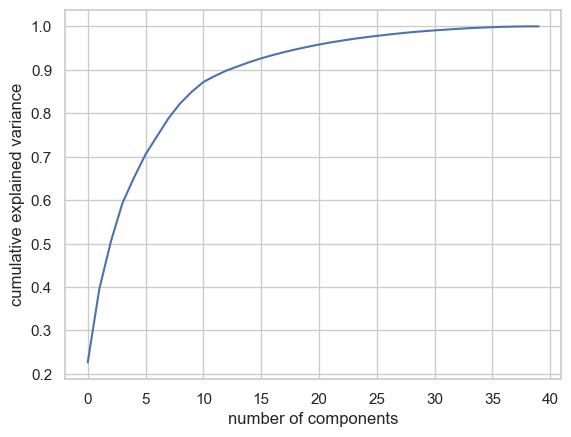

In [50]:
# Plotando gráfico do PCA

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Avaliando o gráfico, com praticamente 20 componentes/features já atingimos um valor satisfatório de carrego da energia/informação do modelo.

In [51]:
# Usando PCA para buscar pelo menos 95% da energia

pca = PCA(n_components= 0.95)
pca.fit(X_train)

X_pca_train = pca.transform(X_train)

In [52]:
# Criando novo modelo usando dados do PCA

model = MLPClassifier()

clf_pca = GridSearchCV(model, parameters)

In [54]:
clf_pca.fit(X_pca_train, y_train)

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\neural_network\_mul

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [55]:
# Avaliando resultado no modelo aplicando PCA

clf_pca.score(X_pca_train,y_train)

0.975

In [56]:
# Verificando o score do modelo sobre a base de teste
X_pca_test = pca.transform(X_test)

clf_pca.score(X_pca_test, y_test)

0.8

In [57]:
# Quais parâmetros foram utilizados pelo GridSearchCV no PCA

clf_pca.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 8,
 'learning_rate_init': 0.05,
 'random_state': 42,
 'solver': 'sgd'}

In [59]:
# Dados do modelo anterior ao PCA

clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 16,
 'learning_rate_init': 0.02,
 'random_state': 42,
 'solver': 'sgd'}

Avaliando o uso do PCA tivemos uma melhora no modelo, na questão de eficiência porque utilizamos uma taxa de aprendizado maior e também utilizamos um número menor de neurônios na camada intermediária. Além de melhorar o score do modelo.